## Rozwiązanie listy 4

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi

### Zad. 1

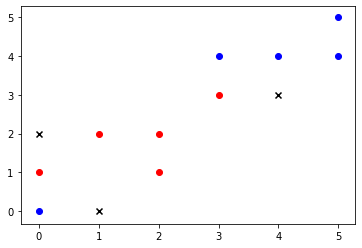

In [4]:
x_c0 = [0, 1, 2, 2, 3] # r
y_c0 = [1, 2, 1, 2, 3]
x_c1 = [3, 4, 5, 5, 0] # b
y_c1 = [4, 4, 4, 5, 0]
x_u1 = [0, 4, 1]
y_u1 = [2, 3, 0]
plt.scatter(x_c0, y_c0, c = 'r')
plt.scatter(x_c1, y_c1, c = 'b')
plt.scatter(x_u1, y_u1, c = 'k', marker = 'x')
plt.show()

 1. Punkt (0, 2) znajduje się najbliżej punktów (0, 1) oraz (1, 2). Oba sklasyfikowane są jako 0 (czerwone), dlatego ten punkt również klasyfikujemy jako 0.
 2. Punkt (1, 0) leży najbliżej punktu (0, 0) sklasyfikowanego jako 1 (niebieski), dlatego klasyfikujemy go jako 1. Dwa kolejne najbliższe punkty są oddalone o $\sqrt2$
 3. Punkt (4, 3) natomiast znajduje się w odległości 1 od punktów (3, 3) oraz (4, 4), jednal każdy z nich ma inną etykietę. W takim przypadku nie da się go sklasyfikować, w rzeczywistości losuje się klasę spośród najbliższych.

### Zad. 2

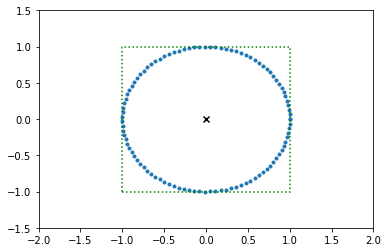

In [13]:
x_u2 = [0]
y_u2 = [0]

plt.plot([-1, 1, 1, -1, -1], [-1, -1, 1, 1, -1], 'g:')

t = np.linspace(0, 2 * pi, 100)
plt.scatter(np.cos(t), np.sin(t), marker = '.')

plt.scatter(x_u2, y_u2, c = 'k', marker = 'x')

plt.xlim(-2, 2)
plt.ylim(-1.5, 1.5)

plt.show()

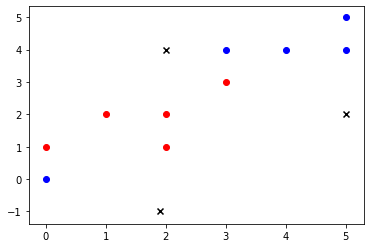

In [5]:
x_u2 = [2, 5, 1.9]
y_u2 = [4, 2, -1]
plt.scatter(x_c0, y_c0, c = 'r')
plt.scatter(x_c1, y_c1, c = 'b')
plt.scatter(x_u2, y_u2, c = 'k', marker = 'x')
plt.show()

 1. Punkt (2, 4) jest równoodległy od punktów (3, 4) oraz (3, 3), nie da się go zatem sklasyfikować.
 2. Punkt (5, 2) jest równoodległy od punktów (3, 3), (3, 4), (4, 4), (5, 4). Nie da się go jednoznacznie sklasyfikować, ale większość spośród naajbliższych punktów ma klasę 1 (niebieską), zatem możemy "strzelać" w tę klasę.
 3. Punkt (1.9; -1) jest najbliższy punktowi (0, 0), zostaje zatem sklasyfikowany jako 1 (niebieski).

### Zad. 3

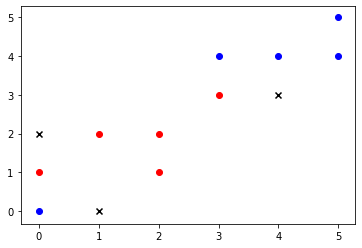

In [4]:
x_c0 = [0, 1, 2, 2, 3] # r
y_c0 = [1, 2, 1, 2, 3]
x_c1 = [3, 4, 5, 5, 0] # b
y_c1 = [4, 4, 4, 5, 0]
x_u1 = [0, 4, 1]
y_u1 = [2, 3, 0]
plt.scatter(x_c0, y_c0, c = 'r')
plt.scatter(x_c1, y_c1, c = 'b')
plt.scatter(x_u1, y_u1, c = 'k', marker = 'x')
plt.show()

 1. Najbliższe punktowi (0, 2) są (0, 1) oraz (1, 2) - Oba sklasyfikowane są jako 0. Oznacza to, że algorytm 2-NN sklasyfikuje je jako 0. Podobnie z algorytmem 3-NN, ponieważ kolejnymi punktami są (0, 0) z klasą 1 oraz (2, 2) z klasą 0, zatem przewaga jest po stronie klasy 0. Gdyby hipotetycznie 2 kolejne punkty były innej klasy niż 2 pierwsze, możemy uznać, że algorytm nie rozstrzyga lub wybrać klasę wskazaną przez najbliższe punkty, a zatem zmniejszyć k o 1. Takie sytuacje są jednak rzadkie, ponieważ w rzeczywistości mamy styczność z liczbami wymiernymi.
 2. Punkt (1, 0) leży najbliżej punktów (0, 0), (0, 1) oraz (2, 1), dlatego klasyfikujemy go jako 0. Tym razem algorytm 2-NN nie jest rozstrzygający, a algorytm 3-NN klasyfikuje punkt jako 0 (czyli inaczej niż 1-NN)
 3. Punkt (4, 3) natomiast znajduje się w odległości 1 od punktów (3, 3) oraz (4, 4), dlatego 2-NN ponownie nie jest rozstrzygający. Dla 3-NN powiększamy zbiór sąsiadów o punkty (3, 4) oraz (5, 4), zatem przeważa klasa 1 (tym razem algorytm 1-NN nie rozstrzygał.

### Uwagi:
 1. Jak już wspomniano rzadko się zdarza, że algorytm 3-NN nie rozstrzyga, ponieważ rzadko mamy styczność z liczbami całkowitymi. Ogólnie korzysta się z algorytmów kNN, gdzie k jest liczbą nieparzystą, ponieważ wtedy ryzyko remisu jest mniejsze.
 2. Warto zauważyć, że klasyfikacja między poszczególnymi algorytmami może się diametralnie zmienić, np. dla punktu (1, 0), gdzie 1-NN klasyfikował jako 1, a 3-NN jako 0. Z dużym prawdopodobieństwem możemy stwierdzić, że punkt treningowy (0, 0) jest pomiarem odstającym (błędnym). Zwiększenie wartości k powoduje, że algorytm jest bardziej odporny na pomiary odstające.

### Zad. 4
Algorytm najbliższych centroidów (lub najbliższej średniej - nearest mean / nearest centroid) można rozpatrywać w pewien ciekawy sposób - jako przekształcenie zbioru uczącego na zbiór składający się po jednym punkcie dla każdej klasy (będący punktem średnim). Wtedy dla problemu dwuklasowego można wyznaczyć granicę decyzyjną* - funkcję liniową oddzielającą punkty o różnych klasach wyznaczonych przez klasyfikator.

*Granicę decyzyjną można wyznaczyć w każdym przypadku, ale nie zawsze jest to funkcja liniowa.

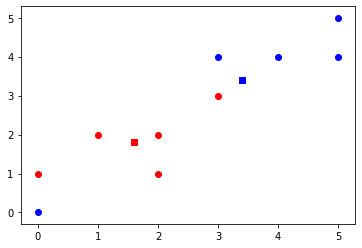

In [31]:
# Obliczmy najpierw centroidy
[xm_c0, ym_c0, xm_c1, ym_c1] = np.array([x_c0, y_c0, x_c1, y_c1]).mean(axis=1)
plt.scatter(xm_c0, ym_c0, c = 'r', marker = 's')
plt.scatter(xm_c1, ym_c1, c = 'b', marker = 's')
plt.scatter(x_c0, y_c0, c = 'r')
plt.scatter(x_c1, y_c1, c = 'b')
plt.show()

Wyznaczyliśmy reprezentantów poszczególnych klas - to do jakiej klasy należy punkt zależy od tego, który z reprezentantów (średnich) jest najbliżej.

Na tej podstawie możemy wyznaczyć granicę decyzyjną - linię prostopadłą do odcinka łączącego centroidy i przechodzącą przez jego środek.

Postać funkcyjna granicy decyzyjnej: y = -1.125 * x + 5.4125


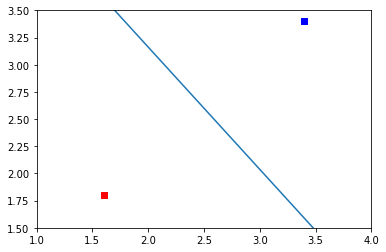

In [54]:
# Wyznaczamy środek odcinka łączącego centroidy:
x_o, y_o = (xm_c0 + xm_c1) / 2, (ym_c0 + ym_c1) / 2
# Współczynnik kierunkowy odcinka:
a_o = (ym_c1 - ym_c0) / (xm_c1 - xm_c0)
# Współczynnik kierunkowy granicy decyzyjnej
a = -1 / a_o
# Punkt przecięcie granicy decyzyjnej z osią x1 (wyraz wolny funkcji liniowej)
# y = ax + b => b = y - ax
b = y_o - a * x_o
print(f'Postać funkcyjna granicy decyzyjnej: y = {a} * x + {b}')

from importlib import reload
reload(plt)
plt.scatter(xm_c0, ym_c0, c = 'r', marker = 's')
plt.scatter(xm_c1, ym_c1, c = 'b', marker = 's')
y = lambda x: a * x + b
plt.plot([1, 4], [y(1), y(4)])
plt.xlim(1, 4)
plt.ylim(1.5, 3.5)
plt.show()

### Zad. 5

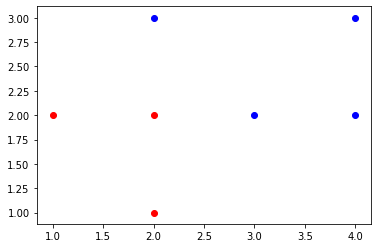

In [57]:
x_svm0, y_svm0, x_svm1, y_svm1 = [1, 2, 2], [2, 1, 2], [2, 3, 4, 4], [3, 2, 2, 3]
plt.scatter(x_svm0, y_svm0, c = 'r')
plt.scatter(x_svm1, y_svm1, c = 'b')

Zbiór dobrany jest tak, że dość łatwo intuicyjnie poprowadzić granicę między klasami - powinna ona przechodzić między punktami(2, 2) a (2, 3) i (3, 2). Żeby odległość wyznaczonej prostej od tych punktów była największa, musi ona być równoległa do punktów (2, 3) i (3, 2) i równoogległa od wszystkich trzech punktów.

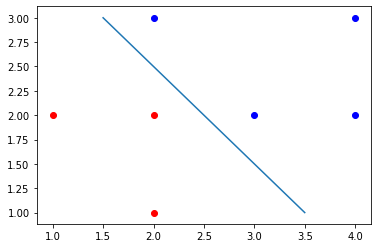

In [59]:
x_svm0, y_svm0, x_svm1, y_svm1 = [1, 2, 2], [2, 1, 2], [2, 3, 4, 4], [3, 2, 2, 3]
plt.scatter(x_svm0, y_svm0, c = 'r')
plt.scatter(x_svm1, y_svm1, c = 'b')
plt.plot([1.5, 3.5], [3, 1])

### Zad. 6
 1. Jeżeli liczba odstających pomiarów jest duża, najlepiej sprawdzą się algorytmy kNN dla dużych wartości k (3, 5, 7 - w zależności od zbioru)
 2. Dla dużego zbioru uczącego algorytmu kNN są zbyt złożone pod względem czasowym i pamięciowym. Lepiej skorzystać z algorytmu najbliższych średnich lub SVM.
 3. Mała ilość danych jest trudnym problemem. Nie można jednoznacznie stwierdzić, który z podanych algorytmów jest najlepszy, na pewno można wykluczyć algorytmy kNN dla dużych wartości k, ponieważ kolejni sąsiedzi mogą znajdować się w dużej odległości od klasyfikowanego obiektu.
 4. Jeżeli nie istnieje granica decyzyjna w postaci funkcji liniowej, odpadają klasyfikatory typu SVM i NM. Dobrze sprawdzą się klasyfikatory typu kNN, o ile spełnione są inne warunki, których wymagają, np. odpowiednia ilość danych.